### Import

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from routing import util, SegmentRoutingSolver, ObliviousRoutingSolver, ShortestPathRoutingSolver

### Load dataset

In [9]:
# parameters
dataset = 'geant'

# load data
t = np.random.randint(low=0, high=4000, size=1)
tm_pred = util.load_traffic_matrix(dataset=dataset, timestep=t)
tm      = util.load_traffic_matrix(dataset=dataset, timestep=t+12)

# load network topology
G = util.load_network_topology(dataset=dataset)
num_node = G.number_of_nodes()

### Plot traffic matrix

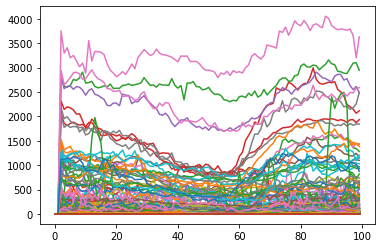

In [10]:
tm_full = util.load_all_traffic_matrix(dataset=dataset)
limit = 100
plt.plot(tm_full[:limit].reshape(limit, -1))
plt.show()

### Oblivious routing

In [ ]:
solver = ObliviousRoutingSolver(G)
solver.solve()
u_ob = util.get_max_utilization_v2(solver, tm)
print('Oblivious Routing:', u_ob)
print('Solver status:', solver.status)

### Plot routed segment

In [ ]:
i, j = 1, 2
if i == j: k = i
else: k = np.argmax(solver.solution[i, j])
print('source={} sink={} middle={} demand={}', i, j, k, tm[i, j])
print('routing=', solver.solution[i, j])
# visualization
util.draw_segment(G, solver.segments[i][j][k], i, j, k)